In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


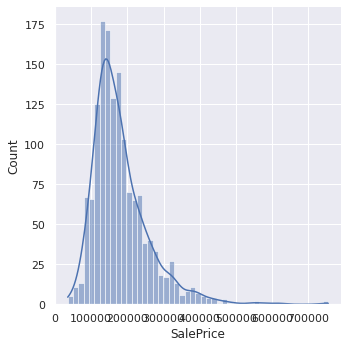

In [5]:
# Analyize target variable 'SalePrice'
sns.displot(df_train['SalePrice'], kde=True)
print('Skewness: {}'.format(df_train['SalePrice'].skew()))
print('Kurtosis: {}'.format(df_train['SalePrice'].kurt()))

In [6]:
# Find out the features which correlated parameter is greater than 0.3
corr = df_train.corr()
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

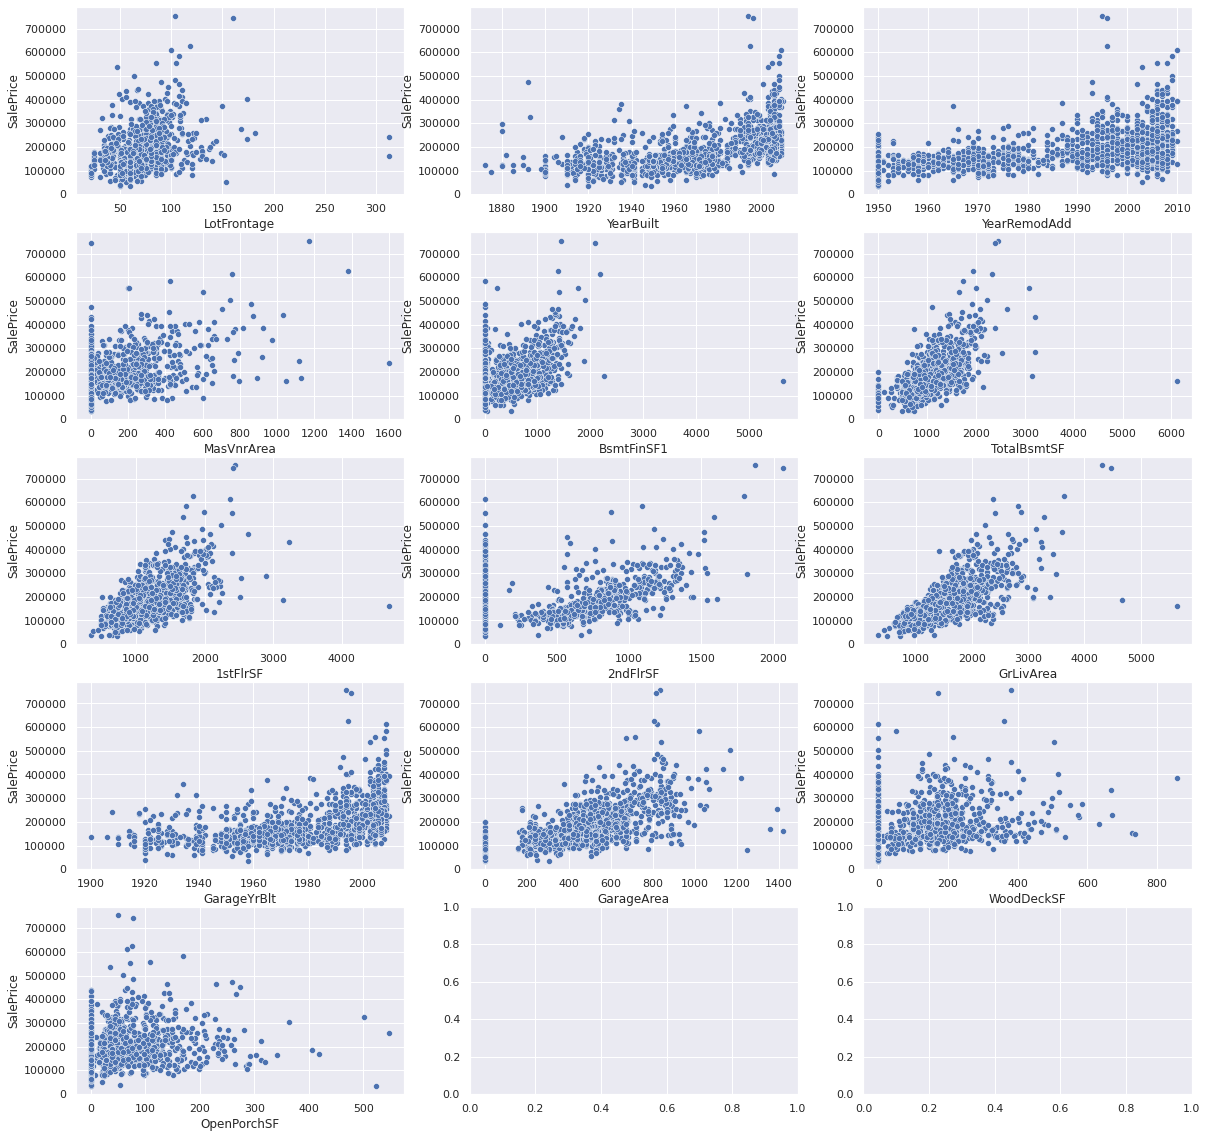

In [7]:
fig, axes = plt.subplots(5, 3, figsize=(20,20))

sns.scatterplot(ax=axes[0,0], x='LotFrontage', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[0,1], x='YearBuilt', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[0,2], x='YearRemodAdd', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[1,0], x='MasVnrArea', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[1,1], x='BsmtFinSF1', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[1,2], x='TotalBsmtSF', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[2,0], x='1stFlrSF', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[2,1], x='2ndFlrSF', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[2,2], x='GrLivArea', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[3,0], x='GarageYrBlt', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[3,1], x='GarageArea', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[3,2], x='WoodDeckSF', y='SalePrice', data=df_train)
sns.scatterplot(ax=axes[4,0], x='OpenPorchSF', y='SalePrice', data=df_train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

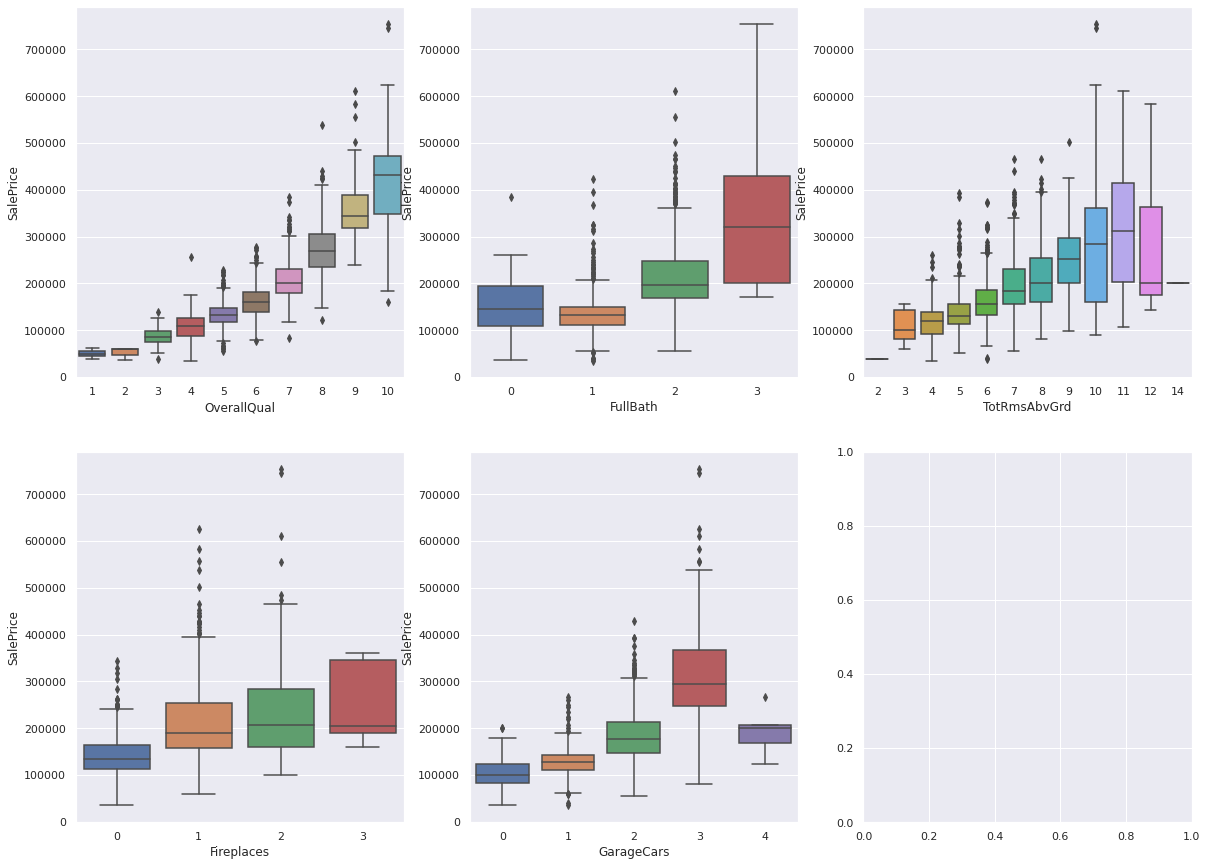

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))

sns.boxplot(ax=axes[0,0], x='OverallQual', y='SalePrice', data=df_train)
sns.boxplot(ax=axes[0,1], x='FullBath', y='SalePrice', data=df_train)
sns.boxplot(ax=axes[0,2], x='TotRmsAbvGrd', y='SalePrice', data=df_train)
sns.boxplot(ax=axes[1,0], x='Fireplaces', y='SalePrice', data=df_train)
sns.boxplot(ax=axes[1,1], x='GarageCars', y='SalePrice', data=df_train)

In [9]:
# Focus on the correlated features
train_correlated_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
test_correlated_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

df_train = df_train[train_correlated_features]
df_test = df_test[test_correlated_features]
print(df_train.shape)
print(df_test.shape)

(1460, 19)
(1459, 18)


In [10]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [11]:
# Check null values in train dataset
df_train.isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
FullBath          0
OpenPorchSF       0
WoodDeckSF        0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
GrLivArea         0
OverallQual       0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtFinSF1        0
YearRemodAdd      0
YearBuilt         0
SalePrice         0
dtype: int64

In [12]:
# Since all features are numerical, fill the null values with mean value
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=train_correlated_features)
df_train.isna().sum().sort_values(ascending=False)

LotFrontage     0
FullBath        0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
GrLivArea       0
OverallQual     0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')


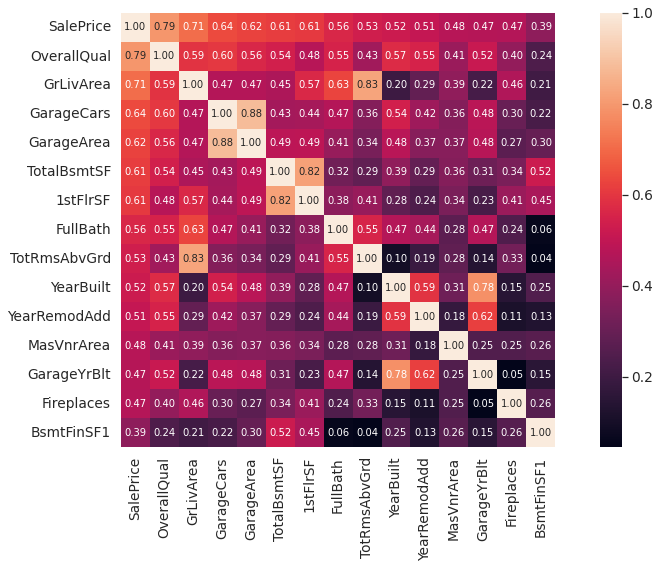

In [13]:
# Choosing features for modeling
plt.figure(figsize=(16,8))
corrmat = df_train.corr()
cols = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
df_train = df_train[cols]
df_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500.0,7.0,1710.0,2.0,548.0,856.0,856.0,2.0,8.0,2003.0,2003.0,196.0,2003.0,0.0,706.0
1,181500.0,6.0,1262.0,2.0,460.0,1262.0,1262.0,2.0,6.0,1976.0,1976.0,0.0,1976.0,1.0,978.0
2,223500.0,7.0,1786.0,2.0,608.0,920.0,920.0,2.0,6.0,2001.0,2002.0,162.0,2001.0,1.0,486.0
3,140000.0,7.0,1717.0,3.0,642.0,756.0,961.0,1.0,7.0,1915.0,1970.0,0.0,1998.0,1.0,216.0
4,250000.0,8.0,2198.0,3.0,836.0,1145.0,1145.0,2.0,9.0,2000.0,2000.0,350.0,2000.0,1.0,655.0


In [15]:
df_test = df_test[cols.drop('SalePrice')]
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [16]:
# Check null values in test dataset
df_test.isnull().sum().sort_values(ascending=False)

GarageYrBlt     78
MasVnrArea      15
GarageCars       1
GarageArea       1
TotalBsmtSF      1
BsmtFinSF1       1
OverallQual      0
GrLivArea        0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
Fireplaces       0
dtype: int64

In [17]:
# Since all features in training dataset is numerical, fill the missing data with mean value
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)
df_test.isna().sum().sort_values(ascending=False)

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
GarageYrBlt     0
Fireplaces      0
BsmtFinSF1      0
dtype: int64

In [18]:
# Split the train dataset into train and test samples
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer


X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 14), (438, 14), (1022,), (438,))

In [19]:
# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
dt_pipe = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor())])
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
gb_pipe = Pipeline([('scaler', StandardScaler()), ('rf', GradientBoostingRegressor())])

cv = KFold(n_splits=10, shuffle=True, random_state=123)

lr_rmse = round(-cross_val_score(lr_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
lr_r2 = round(cross_val_score(lr_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

dt_rmse = round(-cross_val_score(dt_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
dt_r2 = round(cross_val_score(dt_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

rf_rmse = round(-cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
rf_r2 = round(cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

gb_rmse = round(-cross_val_score(gb_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
gb_r2 = round(cross_val_score(gb_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

summary_dict = {'RMSE': [lr_rmse, dt_rmse, rf_rmse, gb_rmse],
                'R2 score': [lr_r2, dt_r2, rf_r2, gb_r2]}

summary = pd.DataFrame(data=summary_dict, index=['Linear regression', 'Decision Tree', 'Random forest', 'Gradient boosting'])
summary

,RMSE,R2 score
Linear regression,39597.70,0.73
Decision Tree,48296.18,0.56
Random forest,32856.12,0.82
Gradient boosting,31173.07,0.84


In [20]:
# Predict the test set
gb_pipe.fit(X_train, y_train)
test_pred = gb_pipe.predict(df_test)
test_pred = pd.DataFrame(test_pred, columns=['SalePrice'])
test_pred

,SalePrice
0,123794.225549
1,149702.605878
2,174199.308749
3,182588.652437
4,200619.020799
...,...
1454,71551.237764
1455,86103.365599
1456,161717.850039
1457,115416.335266


In [21]:
# Get the 'Id' column from the original test dataset
# Combine 'Id' and the prediction into a new dataframe
test_id = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')['Id']

result = pd.concat([test_id, test_pred], axis=1)
result.head()

,Id,SalePrice
0,1461,123794.225549
1,1462,149702.605878
2,1463,174199.308749
3,1464,182588.652437
4,1465,200619.020799


In [22]:
result.to_csv('submission.csv', index=False)